In [1]:
# 1. IMPORT LIBRARIES
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1.2 Import Data
trainData= pd.read_csv("D:\\DS_Projects\\House_Price\\train.csv")
testData= pd.read_csv("D:\\DS_Projects\\House_Price\\test.csv")

In [3]:
### Start Exploring Data
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
trainData.head() 
 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
trainData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#1. Duplicate ? 
display(trainData.duplicated().sum())


0

In [7]:
#2. Nulls ? # There Are Many Nulls We Will Handle It Now
pd.set_option('display.max_rows',10)
display(trainData.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
## All Of this Is Small % So We Will Replace It With Mean
print('BsmtQual Null Percentage Is :')
AllNull= trainData['BsmtQual'].isnull().sum()/ len(trainData['BsmtQual'])*100
print(round(AllNull, 2))

BsmtQual Null Percentage Is :
2.53


In [9]:
#for BsmtCond
print('BsmtCond Null Percentage Is :')
AllNull= trainData['BsmtCond'].isnull().sum()/ len(trainData['BsmtCond'])*100
print(round(AllNull, 2))

BsmtCond Null Percentage Is :
2.53


In [10]:
#for BsmtExposure
print('BsmtExposure Null Percentage Is :')
AllNull= trainData['BsmtExposure'].isnull().sum()/ len(trainData['BsmtExposure'])*100
print(round(AllNull, 2))

BsmtExposure Null Percentage Is :
2.6


In [11]:
#for BsmtFinType1
print('BsmtFinType1 Null Percentage Is :')
AllNull= trainData['BsmtFinType1'].isnull().sum()/ len(trainData['BsmtFinType1'])*100
print(round(AllNull, 2))

BsmtFinType1 Null Percentage Is :
2.53


In [12]:
#for BsmtFinType2
print('BsmtFinType2 Null Percentage Is :')
AllNull= trainData['BsmtFinType2'].isnull().sum()/ len(trainData['BsmtFinType2'])*100
print(round(AllNull, 2))

BsmtFinType2 Null Percentage Is :
2.6


In [13]:
#for Electrical
print('Electrical Null Percentage Is :')
AllNull= trainData['Electrical'].isnull().sum()/ len(trainData['Electrical'])*100
print(round(AllNull, 2))

Electrical Null Percentage Is :
0.07


In [14]:
#for FireplaceQu
print('FireplaceQu Null Percentage Is :')
AllNull= trainData['FireplaceQu'].isnull().sum()/ len(trainData['FireplaceQu'])*100
print(round(AllNull, 2))

FireplaceQu Null Percentage Is :
47.26


In [15]:
#for GarageType
print('GarageType Null Percentage Is :')
AllNull= trainData['GarageType'  ].isnull().sum()/ len(trainData['GarageType'])*100
print(round(AllNull, 2))

GarageType Null Percentage Is :
5.55


In [16]:
#for GarageYrBlt
print('GarageYrBlt Null Percentage Is :')
AllNull= trainData['GarageYrBlt'  ].isnull().sum()/ len(trainData['GarageYrBlt'])*100
print(round(AllNull, 2))

GarageYrBlt Null Percentage Is :
5.55


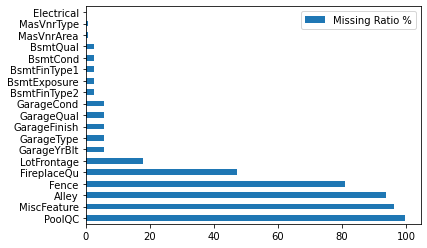

In [17]:
# we can complete It as a calculations Like above but what if we can get it as a graph! let's See

def plot_nas(trainData: pd.DataFrame):
    if trainData.isnull().sum().sum() != 0:
        na_df = (trainData.isnull().sum() / len(trainData)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(trainData)

In [18]:
display(trainData['LotFrontage'].describe())
# So Top Is 70
trainData['LotFrontage'].fillna("70", inplace = True)
trainData['LotFrontage'].isnull().sum()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

0

In [19]:
display(trainData['BsmtQual'].describe())
# So Top Is TA 
trainData['BsmtQual'].fillna("TA", inplace = True)
trainData['BsmtQual'].isnull().sum()


count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

0

In [20]:
display(trainData['BsmtCond'].describe())
# So Top Is TA 
trainData['BsmtCond'].fillna("TA", inplace = True)
trainData['BsmtCond'].isnull().sum()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

0

In [21]:
display(trainData['BsmtExposure'].describe())
# So Top Is No
trainData['BsmtExposure'].fillna("No", inplace = True)
trainData['BsmtExposure'].isnull().sum()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

0

In [22]:
display(trainData['BsmtFinSF1'].describe())
# So Top Is 438.242279
trainData['BsmtFinSF1'].fillna("438.242279", inplace = True)
trainData['BsmtFinSF1'].isnull().sum()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

0

In [23]:
display(trainData['BsmtFinType1'].describe())
# So Top Is Unf
trainData['BsmtFinType1'].fillna("Unf", inplace = True)
trainData['BsmtFinType1'].isnull().sum()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

0

In [24]:
display(trainData['BsmtFinType2'].describe())
# So Top Is Unf
trainData['BsmtFinType2'].fillna("Unf", inplace = True)
trainData['BsmtFinType2'].isnull().sum()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

0

In [25]:
display(trainData['Electrical'].describe())
# So Top Is SBrkr
trainData['Electrical'].fillna("SBrkr", inplace = True)
trainData['Electrical'].isnull().sum()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

0

In [26]:
display(trainData['FireplaceQu'].describe())
# So Top Is Gd
trainData['FireplaceQu'].fillna("Gd", inplace = True)
trainData['FireplaceQu'].isnull().sum()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

0

In [27]:
display(trainData['GarageType'].describe())
# So Top Is Attchd
trainData['GarageType'].fillna("Attchd", inplace = True)
trainData['GarageType'].isnull().sum()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

0

In [28]:
display(trainData['GarageYrBlt'].describe())
# So Top Is 1978.460756
trainData['GarageYrBlt'].fillna("1978.460756", inplace = True)
trainData['GarageYrBlt'].isnull().sum()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

0

In [30]:
display(trainData['GarageFinish'].describe())
# So Top Is Unf
trainData['GarageFinish'].fillna("Unf", inplace = True)
trainData['GarageFinish'].isnull().sum()

count     1460
unique       3
top        Unf
freq       686
Name: GarageFinish, dtype: object

0

In [31]:
display(trainData['GarageQual'].describe())
# So Top Is TA
trainData['GarageQual'].fillna("TA", inplace = True)
trainData['GarageQual'].isnull().sum()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

0

In [32]:
display(trainData['GarageCond'].describe())
# So Top Is TA
trainData['GarageCond'].fillna("TA", inplace = True)
trainData['GarageCond'].isnull().sum()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

0

In [33]:
display(trainData['MasVnrType'].describe())
# So Top Is None
trainData['MasVnrType'].fillna("None", inplace = True)
trainData['MasVnrType'].isnull().sum()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

0

In [34]:
display(trainData['MasVnrArea'].describe())
# So Top Is 102.543133
trainData['MasVnrArea'].fillna("102.543133", inplace = True)
trainData['MasVnrArea'].isnull().sum()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

0

In [35]:
#Drop PoolQC
trainData= trainData.drop('PoolQC', axis=1) ;
#Drop MiscFeature
trainData= trainData.drop('MiscFeature', axis=1)
#Drop Fence
trainData= trainData.drop('Fence', axis=1) ; 
#Drop Alley
trainData= trainData.drop('Alley', axis=1)
trainData.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [36]:
def plot_nas(trainData: pd.DataFrame):
    if trainData.isnull().sum().sum() != 0:
        na_df = (trainData.isnull().sum() / len(trainData)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No Nulls found')
plot_nas(trainData)

No Nulls found


In [37]:
trainData.select_dtypes(include=np.number).columns.tolist()

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [38]:
trainData.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,70,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


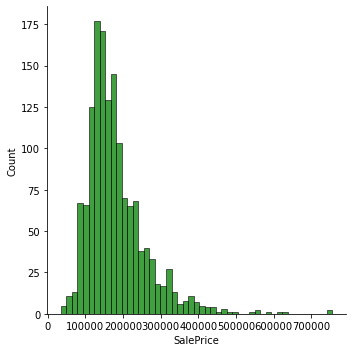

In [39]:
display(pd.DataFrame(trainData['SalePrice'].describe()))
sns.displot(trainData['SalePrice'], kind='hist',
            fill = True, color = 'g');

Lower Limit is : 3937.5
Upper Limit is : 340037.5
180921.19589041095


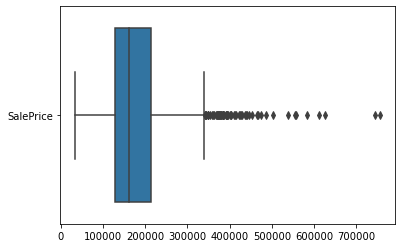

In [40]:
#First Step : Get Calcs
Q1= trainData['SalePrice'].quantile(.25)
Q3= trainData['SalePrice'].quantile(.75)
IQR= Q3-Q1
lowLimit= Q1-1.5*IQR
highLimit= Q3+1.5*IQR
print("Lower Limit is :" , lowLimit)
print("Upper Limit is :" , highLimit)

sns.boxplot(data=trainData[["SalePrice"]], orient="h")
#Simple Graph Shows Us Amount Of It
pricebef= trainData['SalePrice'].mean()
print(pricebef)

In [41]:
#Second Step : Eliminate The Outliers
trainData = trainData.drop(trainData[trainData.SalePrice > highLimit].index)
trainData = trainData.drop(trainData[trainData.SalePrice < lowLimit].index)

,SalePrice
count,1399.000000
mean,170237.127234
std,59230.130817
min,34900.000000
25%,129000.000000
50%,159500.000000
75%,203500.000000
max,340000.000000


<AxesSubplot:>

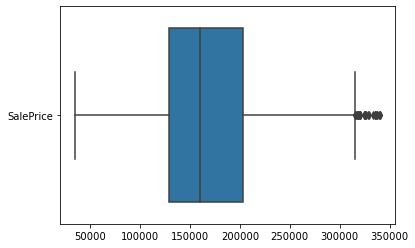

In [42]:
#Third Step : See Diffrence In Graphs & Mean
display(pd.DataFrame(trainData['SalePrice'].describe()))
sns.boxplot(data=trainData[["SalePrice"]], orient="h")

<AxesSubplot:>

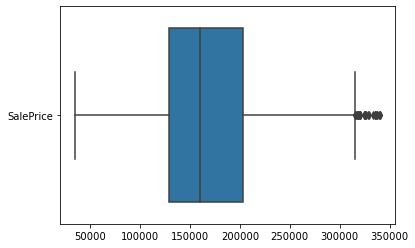

In [44]:
trainData['SalePrice'] = np.where(trainData['SalePrice'] < lowLimit, 170244.449928, trainData['SalePrice'])
trainData['SalePrice'] = np.where(trainData['SalePrice'] > highLimit, 170244.449928, trainData['SalePrice'])
sns.boxplot(data=trainData[["SalePrice"]], orient="h")

In [45]:
priceaft= trainData['SalePrice'].mean()
print("The Diffrence In Price After Eliminate Outliers Is : " )
print(round(priceaft-pricebef))


The Diffrence In Price After Eliminate Outliers Is : 
-10684
